In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from source.modeling import *

In [2]:
df = pd.read_csv('data/ml1.csv')


In [3]:
X = df.loc[:, df.columns != 'price'].to_numpy()
y = df['price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.20)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5148, 217), (5148,), (1287, 217), (1287,))

Let's try to validate which degree is the best (1 to 3) for a potential polynomial regression fitting using 3-fold cross validation.

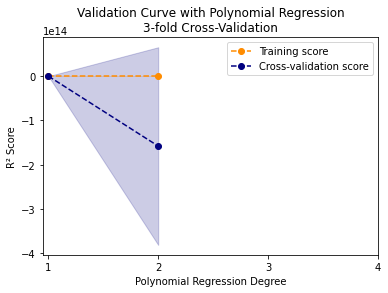

In [10]:
plot_poly_reg_validation_curves(X_train, y_train, 3, 4)

As we can see, the accuracy on cross-validated training sets is very pool for every degree higher than one. Supposedly not beacause the underlying target is in fact purely linear, but because the polynomially transformed feature space is now too large to search with our limited trainin set.
Let's then use an ordinary LR model.

In [5]:
lin_reg_model = OLS_linear_regression(X_train, y_train)
score_train = lin_reg_model.score(X_train, y_train)
score_test = lin_reg_model.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')


train score:	0.7751708111884703
test score:	0.7484440742648244


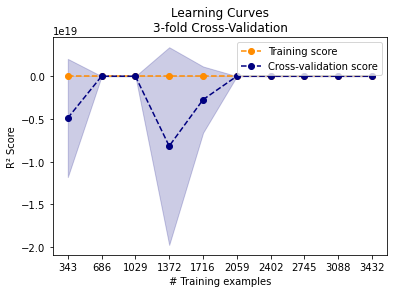

In [6]:
plot_OLS_lin_reg_r2_curves(X_train, y_train, 3)

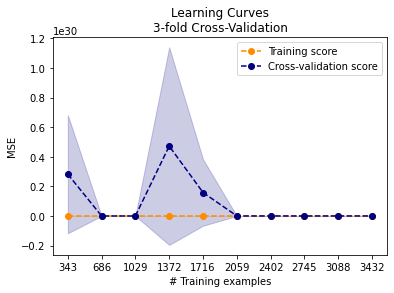

In [7]:
plot_OLS_lin_reg_MSE_curves(X_train, y_train, 3)